In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_gaussian(x_points, y_points, title):
    plt.scatter(x_points, y_points, alpha=0.5)
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

### Understanding Covariance Matrix in 2D Gaussian Distribution

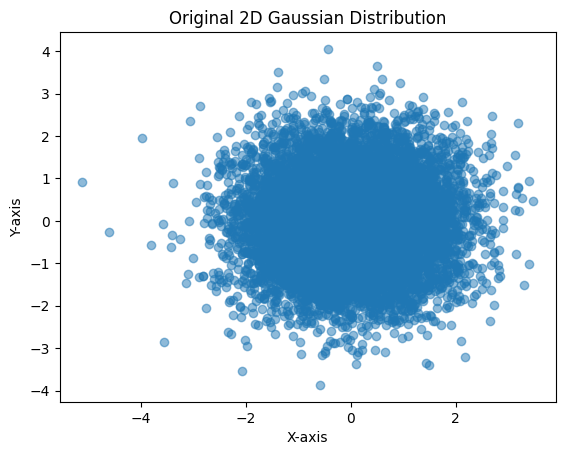

Calculated Covariance Matrix:
[[0.99812208 0.0076922 ]
 [0.0076922  1.01237996]]


In [3]:
# Step 1: Generate 2D Gaussian distribution along X and Y axes independently
mean = [0, 0]
covariance_matrix = [[1, 0], [0, 1]]
num_points = 10000

# Generate random points with Gaussian distribution for both axes
x_points, y_points = np.random.multivariate_normal(mean, covariance_matrix, num_points).T

# Step 2: Calculate the covariance matrix for the generated dataset
dataset = np.array([x_points, y_points])
calculated_covariance = np.cov(dataset)

# Step 3: Plot the generated points
plot_gaussian(x_points, y_points, 'Original 2D Gaussian Distribution')

print("Calculated Covariance Matrix:")
print(calculated_covariance)

### Transformation of Gaussian Distribution using Matrix [[2, 0], [0, 3]]

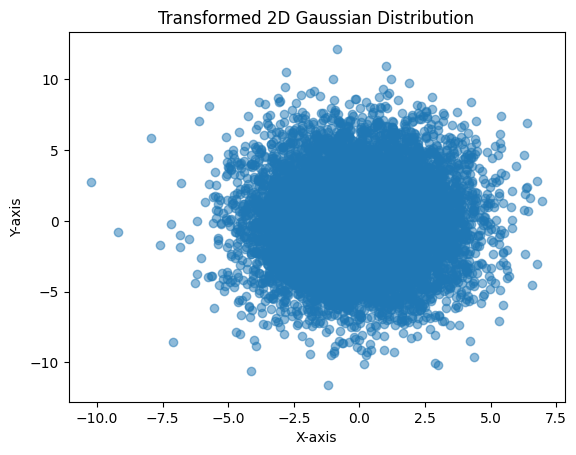

Transformed Covariance Matrix:
[[3.99248831 0.0461532 ]
 [0.0461532  9.11141961]]


In [4]:
# Step 4: Generate transformation Matrix
transformation_matrix1 = np.array([[2, 0], [0, 3]])
transformed_dataset1 = np.dot(transformation_matrix1, dataset)

# Step 5: Calculate the covariance matrix for the transformed dataset
transformed_covariance = np.cov(transformed_dataset1)

# Step 6: Plot the transformed Gaussian distribution
x_transformed = transformed_dataset1[0]
y_transformed = transformed_dataset1[1]
plot_gaussian(x_transformed, y_transformed, 'Transformed 2D Gaussian Distribution')

print("Transformed Covariance Matrix:")
print(transformed_covariance)

### Further Transformation of Gaussian Distribution using Matrix [[2, 1], [1, 3]]

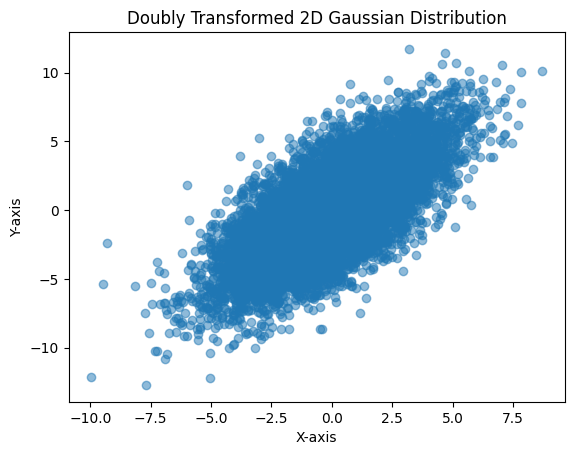

Doubly Transformed Covariance Matrix:
[[ 5.03563707  5.08722942]
 [ 5.08722942 10.15569489]]


In [8]:
# Strp 7: Generate second transformation matrix
transformation_matrix2 = np.array([[2, 1], [1, 3]])
transformed_dataset2 = np.dot(transformation_matrix2, dataset)

# Step 8: Calculate the covariance matrix for the doubly transformed dataset
doubly_transformed_covariance = np.cov(transformed_dataset2)

# Step 9: Plot the doubly transformed Gaussian distribution
x_doubly_transformed = transformed_dataset2[0]
y_doubly_transformed = transformed_dataset2[1]
plot_gaussian(x_doubly_transformed, y_doubly_transformed, 'Doubly Transformed 2D Gaussian Distribution')

print("Doubly Transformed Covariance Matrix:")
print(doubly_transformed_covariance)

### Visualizing Eigenvectors and Eigenvalues of the Covariance Matrix

In [9]:
def plot_eigenvectors(eigenvectors, eigenvalues):
    origin = [0, 0]

    plt.quiver(*origin, eigenvectors[0, 0], eigenvectors[1, 0], color=['r'], scale=0.25, scale_units='xy', angles='xy', label='Eigenvector 1')
    plt.quiver(*origin, eigenvectors[0, 1], eigenvectors[1, 1], color=['b'], scale=0.25, scale_units='xy', angles='xy', label='Eigenvector 2')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Eigenvectors Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

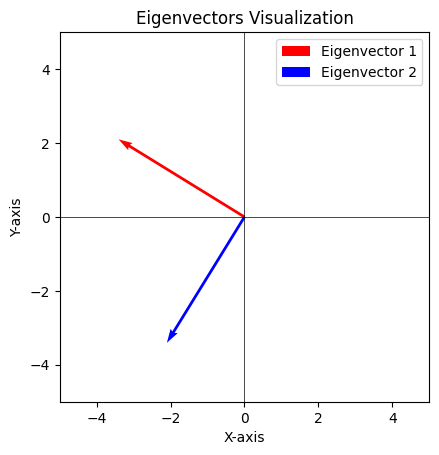

Eigenvalues:
[ 1.900611   13.29072096]
Eigenvectors:
[[-0.85132774 -0.52463423]
 [ 0.52463423 -0.85132774]]


In [10]:
# Step 10: Get eigenvalues of covariance of transformed dataset
eigenvalues, eigenvectors = np.linalg.eig(doubly_transformed_covariance)

# Step 11: Show eigenvectors
plot_eigenvectors(eigenvectors, eigenvalues)

print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

### Projection onto Dominant Eigenvector

In [60]:
def plot_projection(original_points, projected_points, title):
    plt.scatter(original_points[0], original_points[1], alpha=0.5, label='Original Points')
    plt.scatter(projected_points[:, 0], projected_points[:, 1], alpha=0.5, label='Projected Points', marker='x', color='r')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

[-0.52201194 -0.85293818]


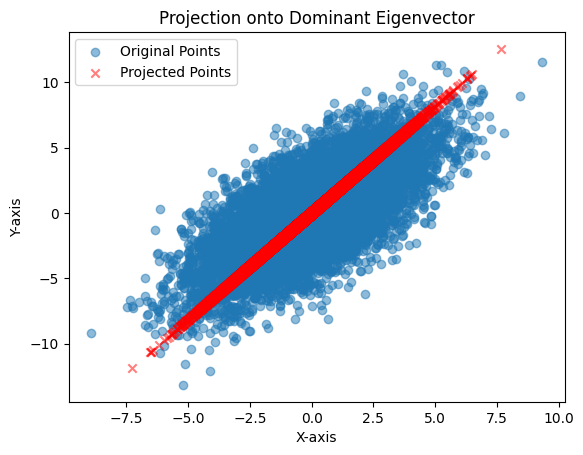

In [61]:
# Step 12: Project onto the dominant eigenvector
dominant_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print(dominant_eigenvector)
projected_points = np.dot(dominant_eigenvector, transformed_dataset2)

# Step 13: Plot original and projected points
plot_projection(transformed_dataset2, projected_points[:, np.newaxis] * dominant_eigenvector, 'Projection onto Dominant Eigenvector')